In [104]:
import pandas as pd
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

print("Item Category Info")
item_cat = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/item_categories.csv")
print(item_cat.info)

print("\nItem Info")
item = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/items.csv")
print(item.info)

print("\nShops Info")
shops = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/shops.csv")
print(shops.info)

print("\nTest")
test = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/test.csv")
print(test.info)

print("\nTrain")
train = pd.read_csv("C:/Users/KANGHEA/OneDrive - Hilti/Study/WQD7003/Assignment/GroupAssignment/sales_train.csv")
print(train.info)

Item Category Info
<bound method DataFrame.info of            item_category_name  item_category_id
0     PC - Гарнитуры/Наушники                 0
1            Аксессуары - PS2                 1
2            Аксессуары - PS3                 2
3            Аксессуары - PS4                 3
4            Аксессуары - PSP                 4
..                        ...               ...
79                  Служебные                79
80         Служебные - Билеты                80
81    Чистые носители (шпиль)                81
82  Чистые носители (штучные)                82
83           Элементы питания                83

[84 rows x 2 columns]>

Item Info
<bound method DataFrame.info of                                                item_name  item_id  \
0              ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1      !ABBYY FineReader 12 Professional Edition Full...        1   
2          ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3        ***ГОЛУБАЯ ВОЛНА  (Un

In [53]:
print('Check whether we have null data')
item_cat.isnull().sum()

Check whether we have null data


item_category_name    0
item_category_id      0
dtype: int64

In [54]:
print('Check whether we have null data for item')
item.isnull().sum() 

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [55]:
print('Check whether we have null data for test set')
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [66]:
print('Check whether we have null data for training set')
train.isnull().sum()

Check whether we have null data for training set


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [64]:
print('Compare number of item and number of unique it')
item.count()

Compare number of item and number of unique item_id


item_name           22170
item_id             22170
item_category_id    22170
dtype: int64

In [76]:
len(pd.unique(item['item_id'])) 

22170

In [77]:
print("Checking how many negative value")
train['item_cnt_day'].loc[lambda x : x>0].count()

Checking how many negative value


2928493

In [78]:
train['item_cnt_day'].loc[lambda x : x<0].count()

7356

In [151]:
# Checking totaly sales per item category

x = train.groupby(['item_id'])['item_price'].sum()

x = pd.merge(x,item,on='item_id')

x = x.groupby(['item_category_id']).agg({'item_price': ['sum']}).reset_index()

x.columns = ['item_category_id', 'total_item_price']
print(x)

    item_category_id  total_item_price
0                  0      2.634000e+02
1                  1      4.310000e+02
2                  2      4.175334e+07
3                  3      5.323800e+07
4                  4      1.278020e+06
..               ...               ...
79                79      9.924972e+06
80                80      1.651035e+06
81                81      1.502950e+05
82                82      1.425917e+05
83                83      7.226243e+05

[84 rows x 2 columns]


41.0
314836356.1224887
31135840.14718125
9038632.528333329
    item_category_id  total_item_price
19                19      3.148364e+08
20                20      2.207125e+08
23                23      2.171441e+08
30                30      1.755141e+08
12                12      1.694266e+08
..               ...               ...
1                  1      4.310000e+02
52                52      3.000000e+02
0                  0      2.634000e+02
51                51      1.290000e+02
50                50      4.100000e+01

[84 rows x 2 columns]
    item_category_id  total_item_price
19                19      3.148364e+08
20                20      2.207125e+08
23                23      2.171441e+08
30                30      1.755141e+08
12                12      1.694266e+08
40                40      1.447424e+08
55                55      9.719241e+07
28                28      8.590357e+07
37                37      8.367633e+07
75                75      7.923592e+07
11                11 

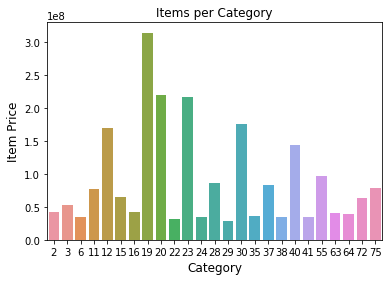

In [152]:
#print(x)

print(x.total_item_price.min())
print(x.total_item_price.max())
print(x.total_item_price.mean())
print(x.total_item_price.median())

x = x.sort_values(by=['total_item_price'], ascending =False)
print(x)

x = x.head(n = 25)

print(x)

# #plot
# plt.figure(figsize=(8,4))
ax= sns.barplot(x.item_category_id, x.total_item_price)
plt.title("Items per Category")
plt.ylabel('Item Price', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()